## Universidad del Valle de Guatemala
### Security Data Science
* Juan Marroquin 19845
* Carlos Raxtum 19721


##### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, tree, model_selection, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import re
import pandas_profiling
%matplotlib inline

ModuleNotFoundError: No module named 'six.moves.collections_abc'

#### Load the dataset

In [3]:
df = pd.read_csv ('dataset_pishing.csv')

#### Show first 5 rows

In [5]:
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
dataset.columns.values

#### Show the count of observations in the status columns

In [6]:
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Se puede observar que el dataset esta balanceado ya que hay la misma cantidad de urls catalogadas como pshing como legitimate

Derivación de características
En base al artículo “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”, derivar las características basadas en el dominio: f1, f2, f4 – f20, f25, f26 y f27.
Para ello escriba las funciones necesarias y genere las nuevas columnas del dataset. Muestre un nuevo
ejemplo de cinco observaciones donde se visualicen algunas de las columnas nuevas

#### Show first 5 rows after transformations

In [7]:
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


#### Preprocessing the dataset

In [9]:
# converting the status column to binariy
df['status'] = np.where(df['status'] == 'phishing', 1, 0)

In [10]:
df = df.drop(['url'], axis=1)

#### Pandas Profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\melma\AppData\Roaming\Python\Python39\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\melma\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (66).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

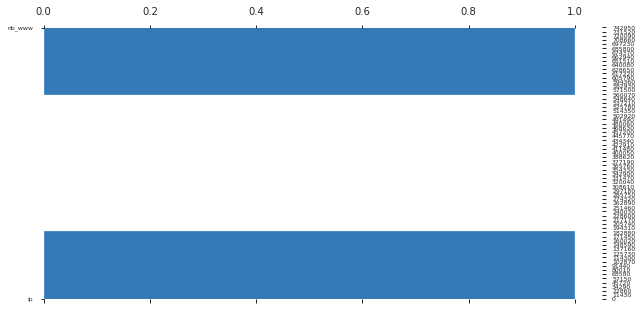

In [12]:
profile = df.profile_report(title="Phishing dataset Report")
profile.to_file(output_file="lab1_pandas_report.html")

#### Based on the report, drop the next columns

In [ ]:
df = df.drop(['url'], axis=1)

#### Create the train,test and validation 
* train size 55%
* test size 30%
* validation size 15%

In [26]:
train_size=0.55
test_size = 0.66 # this is equavalent to the 30% of the test size

In [17]:
X = df.drop(columns = ['status']).copy()
y = df['status']

In [31]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=train_size,random_state=42)

In [32]:
# Now since we want the valid and test size. 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=test_size,random_state=42)

#### Saving the train, test and validation data sets

In [50]:
train_df = X_train.copy()
train_df['status'] = y_train.tolist()
train_df.reset_index(drop=True, inplace=True)
train_df.to_csv('train_dataset.csv', index = False, encoding='utf-8')

In [51]:
valid_df = X_valid.copy()
valid_df['status'] = y_valid.tolist()
valid_df.reset_index(drop=True, inplace=True)
valid_df.to_csv('validation_dataset.csv', index = False, encoding='utf-8')

In [52]:
test_df = X_test.copy()
test_df['status'] = y_test.tolist()
test_df.reset_index(drop=True, inplace=True)
test_df.to_csv('test_dataset.csv', index = False, encoding='utf-8')

#### Machine Learning Implamentation

Utilice dos algoritmos de Machine Learning para entrenar el modelo. Muestre y explique los valores obtenidos de las siguientes métricas para los datos de validación y pruebas, para cada modelo, en base al contexto del problema (detección de Pishing).
* Matriz de confusión
* Precision
* Recall
* F1 Score

#### Discusion

1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?
2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo?
3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de pishing?
4. ¿Qué modelo es mejor para la clasificación de Pishing? Justifique
5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para tomar la decisión final?